In [1]:
import numpy as np
from sklearn.preprocessing import LabelBinarizer
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
from urllib.request import urlopen,urlretrieve
from PIL import Image
from tqdm import tqdm_notebook
%matplotlib inline
from sklearn.utils import shuffle
import cv2

from keras.models import load_model
from sklearn.datasets import load_files   
from keras.utils import np_utils
from glob import glob
from keras import applications
from keras.preprocessing.image import ImageDataGenerator 
from keras import optimizers
from keras.models import Sequential,Model,load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D
from keras.callbacks import TensorBoard,ReduceLROnPlateau,ModelCheckpoint

Using TensorFlow backend.


In [2]:
import numpy as np
from sklearn.preprocessing import LabelBinarizer
import cv2 as cv
import matplotlib.pyplot as plt
import random
import sys
from PIL import Image

In [56]:
def crop_image(imgarray):
    height, width = imgarray.shape
    xmin = None
    for i,l in enumerate(imgarray.T):
        #print (i)
        if np.average(l) < 255:
            xmin = max(i-1,0)
            break
    ymin = None
    for i,l in enumerate(imgarray):
        #print (i)
        if np.average(l) < 255:
            ymin = max(i-1,0)
            break
    ymax = None
    for i,l in enumerate(imgarray[::-1]):
        #print (i, sum(l))
        if np.average(l) < 255:
            ymax = min(height-i+1,height)
            break
    xmax = None
    for i,l in enumerate(imgarray.T[::-1]):
        #print (i)
        if np.average(l) < 255:
            xmax = min(width-i+1,width)
            break
    print ("%d,%d : %d,%d"%(xmin,xmax,ymin,ymax))  
    script_type= None
    print (ymax - ymin)
    print (height, width)
    if ymax - ymin < 0.5 * height and ymin > 0.25*height:
        script_type = '_'
    elif ymax - ymin < 0.5 * height and ymax < 0.75*height:
        script_type = '^'
    #print (script_type)
    return (cv2.resize(imgarray[ymin:ymax,xmin:xmax], dsize=(64, 64), interpolation=cv2.INTER_AREA ),script_type)

In [4]:
#Load Model
from tensorflow.python.keras.models import model_from_json

name = "baseline-gaussian"
directory = "models/"
model_json_filename = directory + name + ".json"
model_weights_filename = directory + name + ".h5"
# load json and create model
json_file = open(model_json_filename, 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights(model_weights_filename)
print("Model loaded successfully")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model loaded successfully


In [5]:
train=np.load('./training_data_min.npz',allow_pickle=True)
test=np.load('./val_data_min.npz',allow_pickle=True)

In [6]:
x_train=train['data'][...,0]
y_train=train['data'][...,1]
x_test=test['data'][...,0]
y_test=test['data'][...,1]
encoder = LabelBinarizer()
y_train = encoder.fit_transform(y_train)
y_test=encoder.transform(y_test)
b=np.array([y.ravel() for y in y_test.ravel()])
y_test_t=b.reshape(len(y_test),11)

x_train_tr=[crop_image(np.array(i))[0] for i in x_train]
x_train_t=np.array(x_train_tr).reshape(len(x_train),64,64,1)
            
x_test_tr=[crop_image(np.array(i))[0] for i in x_test]
x_test_t=np.array(x_test_tr).reshape(len(x_test),64,64,1)

print("Datasets set successfully. \n")
print ("number of test examples = " + str(x_test_t.shape[0]))
print ("X_test shape: " + str(x_test_t.shape))
print ("Y_test shape: " + str(y_test.shape))
print("")

3,61 : 1,63
62
64 64
5,59 : 1,63
62
64 64
2,62 : 1,63
62
64 64
3,62 : 3,63
60
64 64
4,60 : 1,63
62
64 64
2,62 : 1,63
62
64 64
3,61 : 1,63
62
64 64
3,61 : 1,63
62
64 64
4,60 : 1,63
62
64 64
3,61 : 1,63
62
64 64
3,61 : 1,63
62
64 64
4,60 : 1,63
62
64 64
3,61 : 1,63
62
64 64
4,60 : 1,63
62
64 64
3,62 : 1,63
62
64 64
3,61 : 2,63
61
64 64
3,61 : 1,63
62
64 64
4,61 : 1,63
62
64 64
2,62 : 1,63
62
64 64
3,61 : 3,63
60
64 64
4,60 : 1,63
62
64 64
5,60 : 1,63
62
64 64
4,60 : 1,63
62
64 64
2,62 : 1,63
62
64 64
2,62 : 1,63
62
64 64
3,61 : 1,63
62
64 64
4,60 : 1,63
62
64 64
4,61 : 1,63
62
64 64
4,61 : 1,63
62
64 64
3,61 : 1,63
62
64 64
4,60 : 1,63
62
64 64
5,59 : 1,63
62
64 64
3,59 : 1,63
62
64 64
3,61 : 1,63
62
64 64
4,60 : 1,63
62
64 64
3,61 : 1,63
62
64 64
4,62 : 1,63
62
64 64
2,62 : 1,63
62
64 64
3,61 : 1,63
62
64 64
2,61 : 1,63
62
64 64
4,60 : 1,63
62
64 64
3,61 : 1,63
62
64 64
3,61 : 1,63
62
64 64
3,61 : 1,63
62
64 64
3,61 : 1,63
62
64 64
3,61 : 1,63
62
64 64
3,62 : 1,63
62
64 64
4,60 : 1,63
6

2,62 : 1,61
60
64 64
3,63 : 1,61
60
64 64
2,61 : 1,61
60
64 64
2,62 : 2,63
61
64 64
3,61 : 1,63
62
64 64
2,62 : 1,63
62
64 64
1,63 : 3,63
60
64 64
3,61 : 1,63
62
64 64
2,63 : 1,63
62
64 64
1,63 : 2,62
60
64 64
2,62 : 1,63
62
64 64
2,62 : 1,63
62
64 64
1,61 : 1,62
61
64 64
2,62 : 1,63
62
64 64
1,63 : 2,61
59
64 64
1,63 : 3,61
58
64 64
2,61 : 1,63
62
64 64
2,62 : 1,63
62
64 64
1,63 : 3,61
58
64 64
1,63 : 1,61
60
64 64
2,62 : 1,63
62
64 64
2,63 : 1,63
62
64 64
2,62 : 1,63
62
64 64
1,63 : 1,61
60
64 64
2,62 : 1,63
62
64 64
2,62 : 1,62
61
64 64
2,62 : 1,63
62
64 64
2,62 : 1,63
62
64 64
2,61 : 3,61
58
64 64
1,63 : 3,62
59
64 64
1,63 : 3,61
58
64 64
4,62 : 1,63
62
64 64
2,63 : 1,61
60
64 64
2,62 : 1,62
61
64 64
1,63 : 1,61
60
64 64
3,59 : 1,63
62
64 64
1,63 : 1,62
61
64 64
2,62 : 1,63
62
64 64
1,63 : 2,61
59
64 64
1,63 : 3,61
58
64 64
2,62 : 1,63
62
64 64
1,63 : 2,61
59
64 64
2,62 : 1,61
60
64 64
2,63 : 1,63
62
64 64
1,63 : 4,61
57
64 64
2,62 : 1,63
62
64 64
1,63 : 3,62
59
64 64
2,62 : 1,63
6

8,57 : 1,63
62
64 64
6,58 : 1,63
62
64 64
8,56 : 1,63
62
64 64
7,58 : 1,63
62
64 64
9,56 : 1,63
62
64 64
3,61 : 1,63
62
64 64
7,57 : 1,63
62
64 64
4,59 : 1,63
62
64 64
4,60 : 1,63
62
64 64
5,59 : 1,63
62
64 64
6,58 : 1,63
62
64 64
6,59 : 1,63
62
64 64
6,58 : 1,63
62
64 64
5,59 : 1,63
62
64 64
6,58 : 1,63
62
64 64
7,57 : 1,63
62
64 64
7,57 : 1,63
62
64 64
5,59 : 1,63
62
64 64
5,59 : 1,63
62
64 64
4,60 : 1,63
62
64 64
4,60 : 1,63
62
64 64
6,59 : 1,63
62
64 64
4,58 : 1,63
62
64 64
4,60 : 1,63
62
64 64
5,59 : 1,63
62
64 64
6,59 : 1,63
62
64 64
9,56 : 1,63
62
64 64
5,59 : 1,63
62
64 64
3,61 : 1,63
62
64 64
10,55 : 1,63
62
64 64
8,56 : 1,63
62
64 64
7,58 : 1,63
62
64 64
4,60 : 1,63
62
64 64
6,58 : 1,63
62
64 64
5,60 : 1,63
62
64 64
6,58 : 1,63
62
64 64
6,58 : 1,63
62
64 64
5,59 : 1,63
62
64 64
8,57 : 1,63
62
64 64
6,59 : 1,63
62
64 64
4,60 : 1,63
62
64 64
7,58 : 1,63
62
64 64
7,58 : 1,63
62
64 64
4,60 : 1,63
62
64 64
5,60 : 1,63
62
64 64
4,60 : 1,63
62
64 64
3,61 : 1,63
62
64 64
4,60 : 1,63


62
64 64
6,59 : 1,63
62
64 64
4,60 : 1,63
62
64 64
10,56 : 1,63
62
64 64
4,60 : 1,63
62
64 64
6,59 : 1,63
62
64 64
5,59 : 1,63
62
64 64
5,60 : 1,63
62
64 64
4,60 : 1,63
62
64 64
5,59 : 1,63
62
64 64
4,60 : 1,63
62
64 64
3,61 : 1,63
62
64 64
7,57 : 1,63
62
64 64
3,61 : 1,63
62
64 64
5,59 : 1,63
62
64 64
4,60 : 1,63
62
64 64
6,58 : 1,63
62
64 64
5,59 : 1,63
62
64 64
3,61 : 1,63
62
64 64
5,59 : 1,63
62
64 64
7,57 : 1,63
62
64 64
5,59 : 1,63
62
64 64
4,60 : 1,63
62
64 64
7,58 : 1,63
62
64 64
3,61 : 1,63
62
64 64
11,54 : 1,63
62
64 64
7,59 : 1,63
62
64 64
5,60 : 1,63
62
64 64
7,57 : 1,63
62
64 64
7,57 : 1,63
62
64 64
3,61 : 1,63
62
64 64
5,60 : 1,63
62
64 64
4,61 : 1,63
62
64 64
7,57 : 1,63
62
64 64
6,58 : 1,63
62
64 64
5,60 : 1,63
62
64 64
3,61 : 1,63
62
64 64
4,61 : 1,63
62
64 64
5,59 : 1,63
62
64 64
6,59 : 1,63
62
64 64
6,58 : 1,63
62
64 64
5,59 : 1,63
62
64 64
7,57 : 1,63
62
64 64
8,57 : 1,63
62
64 64
4,60 : 1,63
62
64 64
6,58 : 1,63
62
64 64
5,59 : 1,63
62
64 64
5,59 : 1,63
62
64 64
4,

3,61 : 1,63
62
64 64
2,62 : 1,63
62
64 64
3,61 : 1,63
62
64 64
2,62 : 1,63
62
64 64
3,61 : 1,63
62
64 64
2,62 : 1,63
62
64 64
3,61 : 1,63
62
64 64
3,62 : 1,63
62
64 64
5,61 : 1,63
62
64 64
4,60 : 1,63
62
64 64
2,62 : 1,63
62
64 64
3,61 : 1,63
62
64 64
2,62 : 1,63
62
64 64
4,60 : 1,63
62
64 64
3,62 : 1,63
62
64 64
3,62 : 1,63
62
64 64
4,60 : 1,63
62
64 64
2,62 : 1,63
62
64 64
2,62 : 1,63
62
64 64
3,61 : 1,63
62
64 64
5,61 : 1,63
62
64 64
4,60 : 1,63
62
64 64
3,61 : 1,63
62
64 64
2,63 : 1,63
62
64 64
4,60 : 1,63
62
64 64
3,62 : 1,63
62
64 64
3,61 : 1,63
62
64 64
2,63 : 1,63
62
64 64
1,63 : 11,53
42
64 64
1,63 : 10,51
41
64 64
1,63 : 6,58
52
64 64
1,63 : 4,59
55
64 64
1,63 : 5,59
54
64 64
1,63 : 5,58
53
64 64
1,63 : 8,55
47
64 64
1,63 : 12,51
39
64 64
1,63 : 12,52
40
64 64
1,63 : 9,54
45
64 64
1,63 : 11,52
41
64 64
1,63 : 9,54
45
64 64
1,63 : 5,58
53
64 64
1,63 : 9,55
46
64 64
1,63 : 5,59
54
64 64
1,63 : 9,54
45
64 64
1,63 : 11,53
42
64 64
1,63 : 5,59
54
64 64
1,63 : 13,51
38
64 64
1,63 :

1,63 : 14,48
34
64 64
1,63 : 7,57
50
64 64
1,63 : 13,50
37
64 64
1,63 : 16,48
32
64 64
1,63 : 6,55
49
64 64
1,63 : 4,59
55
64 64
1,63 : 16,48
32
64 64
1,63 : 6,60
54
64 64
1,63 : 10,54
44
64 64
1,63 : 8,56
48
64 64
1,63 : 11,53
42
64 64
1,63 : 6,59
53
64 64
1,63 : 10,54
44
64 64
1,63 : 13,51
38
64 64
1,63 : 11,53
42
64 64
1,63 : 10,53
43
64 64
1,63 : 8,55
47
64 64
1,63 : 5,59
54
64 64
1,63 : 13,50
37
64 64
1,63 : 6,58
52
64 64
1,63 : 16,48
32
64 64
1,63 : 14,50
36
64 64
1,63 : 13,51
38
64 64
1,63 : 10,55
45
64 64
1,63 : 9,54
45
64 64
1,63 : 12,51
39
64 64
1,63 : 3,61
58
64 64
1,63 : 16,48
32
64 64
1,63 : 16,48
32
64 64
1,63 : 6,58
52
64 64
1,63 : 14,50
36
64 64
1,63 : 18,46
28
64 64
1,63 : 5,58
53
64 64
1,63 : 9,54
45
64 64
1,63 : 9,53
44
64 64
1,63 : 9,55
46
64 64
1,63 : 11,53
42
64 64
1,63 : 9,55
46
64 64
1,63 : 8,57
49
64 64
1,63 : 6,57
51
64 64
1,63 : 5,61
56
64 64
1,63 : 12,52
40
64 64
1,63 : 10,54
44
64 64
1,63 : 15,49
34
64 64
1,63 : 13,50
37
64 64
1,63 : 4,60
56
64 64
1,63 : 8,

44
64 64
1,63 : 14,49
35
64 64
1,63 : 14,50
36
64 64
1,63 : 11,53
42
64 64
1,63 : 7,56
49
64 64
1,63 : 9,56
47
64 64
1,63 : 6,58
52
64 64
1,63 : 6,58
52
64 64
1,63 : 12,51
39
64 64
1,63 : 6,58
52
64 64
1,63 : 5,58
53
64 64
1,63 : 8,57
49
64 64
1,63 : 21,43
22
64 64
1,63 : 14,49
35
64 64
1,63 : 5,59
54
64 64
1,63 : 5,59
54
64 64
1,63 : 17,47
30
64 64
1,63 : 12,51
39
64 64
1,63 : 16,48
32
64 64
1,63 : 6,56
50
64 64
1,63 : 12,52
40
64 64
1,63 : 6,57
51
64 64
1,63 : 5,59
54
64 64
1,63 : 7,57
50
64 64
1,63 : 5,58
53
64 64
1,63 : 5,59
54
64 64
1,63 : 8,56
48
64 64
1,63 : 6,58
52
64 64
1,63 : 12,52
40
64 64
1,63 : 18,46
28
64 64
1,63 : 12,52
40
64 64
1,63 : 10,53
43
64 64
1,63 : 13,51
38
64 64
1,63 : 7,55
48
64 64
1,63 : 10,54
44
64 64
1,63 : 20,42
22
64 64
1,63 : 5,59
54
64 64
1,63 : 16,48
32
64 64
1,63 : 7,57
50
64 64
1,63 : 16,48
32
64 64
1,63 : 9,53
44
64 64
1,63 : 6,58
52
64 64
1,63 : 12,50
38
64 64
1,63 : 14,50
36
64 64
1,63 : 13,49
36
64 64
1,63 : 15,49
34
64 64
1,63 : 7,56
49
64 64
1,

62
64 64
3,61 : 2,63
61
64 64
10,55 : 1,63
62
64 64
14,52 : 1,63
62
64 64
15,50 : 1,63
62
64 64
14,51 : 1,63
62
64 64
4,62 : 1,63
62
64 64
11,54 : 1,63
62
64 64
2,62 : 2,63
61
64 64
16,50 : 1,63
62
64 64
5,59 : 1,63
62
64 64
12,53 : 1,63
62
64 64
14,51 : 1,63
62
64 64
6,58 : 1,63
62
64 64
4,61 : 1,63
62
64 64
2,63 : 3,63
60
64 64
5,59 : 1,63
62
64 64
14,52 : 1,63
62
64 64
12,53 : 1,63
62
64 64
6,58 : 1,63
62
64 64
15,51 : 1,63
62
64 64
7,57 : 1,63
62
64 64
9,55 : 1,63
62
64 64
11,54 : 1,63
62
64 64
7,57 : 1,63
62
64 64
11,54 : 1,63
62
64 64
8,56 : 1,63
62
64 64
13,52 : 1,63
62
64 64
3,62 : 1,63
62
64 64
17,49 : 1,63
62
64 64
13,52 : 1,63
62
64 64
10,55 : 1,63
62
64 64
1,63 : 2,62
60
64 64
7,58 : 1,63
62
64 64
7,57 : 1,63
62
64 64
13,53 : 1,63
62
64 64
11,54 : 1,63
62
64 64
3,61 : 1,63
62
64 64
8,56 : 1,63
62
64 64
13,52 : 1,63
62
64 64
7,58 : 1,63
62
64 64
18,48 : 1,63
62
64 64
11,54 : 1,63
62
64 64
2,62 : 1,63
62
64 64
6,58 : 1,63
62
64 64
6,58 : 1,63
62
64 64
7,58 : 1,63
62
64 64
13,

57
64 64
12,53 : 1,63
62
64 64
18,48 : 1,63
62
64 64
11,54 : 1,63
62
64 64
1,63 : 2,62
60
64 64
6,58 : 1,63
62
64 64
1,63 : 3,63
60
64 64
15,50 : 1,63
62
64 64
8,56 : 1,63
62
64 64
17,48 : 1,63
62
64 64
13,52 : 1,63
62
64 64
2,62 : 1,63
62
64 64
12,53 : 1,63
62
64 64
14,51 : 1,63
62
64 64
5,59 : 1,63
62
64 64
8,57 : 1,63
62
64 64
4,60 : 1,63
62
64 64
3,62 : 1,63
62
64 64
3,62 : 1,63
62
64 64
8,56 : 1,63
62
64 64
2,63 : 1,63
62
64 64
4,60 : 1,63
62
64 64
16,50 : 1,63
62
64 64
14,51 : 1,63
62
64 64
8,56 : 1,63
62
64 64
13,52 : 1,63
62
64 64
8,57 : 1,63
62
64 64
16,50 : 1,63
62
64 64
9,56 : 1,63
62
64 64
2,62 : 2,61
59
64 64
19,47 : 1,63
62
64 64
18,48 : 1,63
62
64 64
19,47 : 1,63
62
64 64
7,56 : 1,63
62
64 64
3,61 : 3,63
60
64 64
2,62 : 1,63
62
64 64
2,61 : 1,63
62
64 64
2,62 : 1,63
62
64 64
2,60 : 2,62
60
64 64
1,63 : 1,63
62
64 64
2,62 : 1,63
62
64 64
2,62 : 1,63
62
64 64
2,63 : 1,63
62
64 64
1,63 : 1,63
62
64 64
1,63 : 1,62
61
64 64
1,63 : 1,61
60
64 64
3,63 : 1,63
62
64 64
3,61 : 1,6

61
64 64
2,62 : 1,63
62
64 64
1,63 : 2,62
60
64 64
2,60 : 1,63
62
64 64
1,63 : 1,63
62
64 64
2,62 : 1,62
61
64 64
2,63 : 1,61
60
64 64
2,62 : 1,63
62
64 64
1,63 : 2,63
61
64 64
1,63 : 2,63
61
64 64
2,62 : 1,61
60
64 64
1,63 : 2,63
61
64 64
1,63 : 2,62
60
64 64
2,62 : 1,63
62
64 64
1,63 : 1,62
61
64 64
2,62 : 1,63
62
64 64
1,63 : 1,62
61
64 64
1,63 : 2,61
59
64 64
1,63 : 1,62
61
64 64
2,62 : 1,63
62
64 64
2,62 : 1,63
62
64 64
1,63 : 1,63
62
64 64
1,63 : 1,63
62
64 64
1,63 : 3,62
59
64 64
2,62 : 1,63
62
64 64
2,63 : 2,62
60
64 64
1,63 : 2,61
59
64 64
2,63 : 1,62
61
64 64
1,62 : 1,63
62
64 64
1,63 : 1,63
62
64 64
1,63 : 1,62
61
64 64
2,62 : 1,63
62
64 64
1,63 : 2,62
60
64 64
2,62 : 1,63
62
64 64
2,62 : 1,62
61
64 64
2,63 : 1,63
62
64 64
1,63 : 1,63
62
64 64
1,63 : 1,63
62
64 64
2,62 : 1,63
62
64 64
1,63 : 3,62
59
64 64
1,63 : 2,62
60
64 64
2,62 : 1,63
62
64 64
3,61 : 1,63
62
64 64
1,63 : 2,62
60
64 64
2,62 : 1,63
62
64 64
3,61 : 1,63
62
64 64
1,63 : 1,63
62
64 64
1,63 : 1,63
62
64 64
2,62

62
64 64
1,63 : 1,63
62
64 64
3,63 : 1,63
62
64 64
2,62 : 1,63
62
64 64
2,62 : 1,63
62
64 64
1,63 : 1,63
62
64 64
1,63 : 1,63
62
64 64
2,63 : 1,63
62
64 64
2,62 : 1,62
61
64 64
2,63 : 3,63
60
64 64
1,63 : 1,62
61
64 64
3,59 : 1,63
62
64 64
2,61 : 1,63
62
64 64
2,61 : 1,63
62
64 64
2,62 : 1,63
62
64 64
1,63 : 1,62
61
64 64
2,62 : 1,63
62
64 64
2,61 : 1,63
62
64 64
3,62 : 1,63
62
64 64
1,63 : 1,63
62
64 64
1,63 : 1,62
61
64 64
1,63 : 1,63
62
64 64
2,62 : 1,63
62
64 64
1,63 : 1,63
62
64 64
2,63 : 1,63
62
64 64
3,61 : 1,63
62
64 64
2,62 : 1,63
62
64 64
2,62 : 1,63
62
64 64
1,63 : 1,63
62
64 64
3,61 : 1,63
62
64 64
2,61 : 1,63
62
64 64
1,63 : 1,63
62
64 64
2,62 : 1,63
62
64 64
1,63 : 1,63
62
64 64
3,61 : 1,63
62
64 64
2,62 : 1,63
62
64 64
1,63 : 2,63
61
64 64
3,61 : 1,63
62
64 64
2,62 : 1,63
62
64 64
2,61 : 1,63
62
64 64
2,62 : 1,63
62
64 64
2,62 : 1,63
62
64 64
2,62 : 1,63
62
64 64
2,62 : 1,63
62
64 64
2,63 : 1,63
62
64 64
2,62 : 1,63
62
64 64
2,60 : 1,63
62
64 64
1,63 : 1,63
62
64 64
3,61

3,60 : 1,62
61
64 64
2,62 : 3,63
60
64 64
2,62 : 3,63
60
64 64
2,62 : 1,63
62
64 64
2,62 : 3,63
60
64 64
3,61 : 1,63
62
64 64
1,63 : 1,63
62
64 64
1,63 : 3,61
58
64 64
3,62 : 1,63
62
64 64
5,60 : 1,63
62
64 64
2,63 : 1,63
62
64 64
2,62 : 1,63
62
64 64
2,61 : 1,63
62
64 64
2,63 : 1,63
62
64 64
2,63 : 2,63
61
64 64
3,61 : 1,63
62
64 64
2,60 : 3,63
60
64 64
3,61 : 1,63
62
64 64
3,59 : 1,63
62
64 64
2,62 : 3,63
60
64 64
2,61 : 1,62
61
64 64
1,63 : 2,61
59
64 64
3,63 : 1,63
62
64 64
3,59 : 1,63
62
64 64
4,63 : 3,63
60
64 64
2,62 : 1,63
62
64 64
4,61 : 1,63
62
64 64
3,61 : 1,63
62
64 64
2,62 : 4,63
59
64 64
2,62 : 1,63
62
64 64
2,62 : 2,63
61
64 64
3,61 : 1,63
62
64 64
3,62 : 1,63
62
64 64
2,60 : 1,61
60
64 64
5,61 : 1,63
62
64 64
1,63 : 1,62
61
64 64
2,62 : 2,63
61
64 64
1,63 : 3,61
58
64 64
1,63 : 2,61
59
64 64
4,60 : 1,63
62
64 64
6,58 : 1,63
62
64 64
6,57 : 1,63
62
64 64
7,56 : 1,63
62
64 64
5,60 : 1,63
62
64 64
3,62 : 1,63
62
64 64
7,57 : 1,63
62
64 64
6,57 : 1,63
62
64 64
5,59 : 1,63
6

43
64 64
1,63 : 8,57
49
64 64
1,63 : 18,44
26
64 64
1,63 : 5,59
54
64 64
1,63 : 6,58
52
64 64
1,63 : 5,59
54
64 64
1,63 : 16,48
32
64 64
1,63 : 11,50
39
64 64
1,63 : 5,59
54
64 64
1,63 : 7,57
50
64 64
1,63 : 9,54
45
64 64
1,63 : 13,50
37
64 64
1,63 : 7,56
49
64 64
1,63 : 14,53
39
64 64
1,63 : 6,58
52
64 64
1,63 : 17,47
30
64 64
1,63 : 11,52
41
64 64
1,63 : 8,55
47
64 64
1,63 : 8,55
47
64 64
1,63 : 9,54
45
64 64
1,63 : 9,55
46
64 64
1,63 : 14,50
36
64 64
1,63 : 3,60
57
64 64
1,63 : 11,53
42
64 64
1,63 : 8,56
48
64 64
1,63 : 12,52
40
64 64
1,63 : 11,53
42
64 64
1,63 : 17,47
30
64 64
1,63 : 8,54
46
64 64
1,63 : 10,54
44
64 64
1,63 : 13,51
38
64 64
1,63 : 12,52
40
64 64
1,63 : 11,53
42
64 64
1,63 : 9,54
45
64 64
1,63 : 9,55
46
64 64
1,63 : 9,56
47
64 64
1,63 : 5,59
54
64 64
1,63 : 5,59
54
64 64
1,63 : 11,53
42
64 64
1,63 : 12,52
40
64 64
1,63 : 9,53
44
64 64
1,63 : 7,57
50
64 64
1,63 : 6,58
52
64 64
1,63 : 13,50
37
64 64
1,63 : 3,60
57
64 64
1,63 : 12,52
40
64 64
1,63 : 9,55
46
64 64
1,63 

2,62 : 1,63
62
64 64
1,63 : 1,63
62
64 64
1,63 : 1,63
62
64 64
1,63 : 1,63
62
64 64
2,62 : 1,63
62
64 64
1,63 : 1,62
61
64 64
1,63 : 2,62
60
64 64
1,63 : 1,63
62
64 64
1,63 : 17,47
30
64 64
1,63 : 1,63
62
64 64
2,62 : 1,63
62
64 64
3,61 : 1,63
62
64 64
3,59 : 1,63
62
64 64
1,63 : 1,63
62
64 64
1,63 : 2,62
60
64 64
2,62 : 1,63
62
64 64
3,63 : 1,63
62
64 64
3,61 : 1,63
62
64 64
3,61 : 1,63
62
64 64
3,62 : 1,63
62
64 64
1,63 : 1,63
62
64 64
4,63 : 1,63
62
64 64
2,62 : 2,63
61
64 64
2,62 : 1,63
62
64 64
1,63 : 1,63
62
64 64
1,63 : 1,63
62
64 64
1,63 : 2,62
60
64 64
1,63 : 1,63
62
64 64
1,63 : 1,62
61
64 64
2,62 : 1,63
62
64 64
2,62 : 1,63
62
64 64
2,62 : 1,63
62
64 64
1,63 : 1,63
62
64 64
2,62 : 1,63
62
64 64
1,63 : 1,63
62
64 64
4,59 : 1,63
62
64 64
3,62 : 1,63
62
64 64
2,63 : 1,63
62
64 64
1,63 : 1,62
61
64 64
2,62 : 1,63
62
64 64
3,61 : 1,63
62
64 64
1,63 : 1,63
62
64 64
2,62 : 1,63
62
64 64
1,63 : 1,63
62
64 64
1,63 : 1,63
62
64 64
1,63 : 1,63
62
64 64
1,63 : 1,62
61
64 64
2,62 : 1,63


In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

preds = model.evaluate(x_test_t, y_test_t)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

1453/1453 [==============================] - 3s 2ms/sample - loss: 0.1734 - acc: 0.9470
Loss = 0.17343386458794643
Test Accuracy = 0.94700617


In [8]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(x_test_t)
y_pred = np.argmax(y_pred,axis=1).tolist()
y_true=np.argmax(y_test,axis=1).tolist()
classes={i:str(k) for i,k in enumerate(encoder.classes_)}

print('Classification Report')
target_names = list(classes.values())
print(classification_report(y_true, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

           (       0.93      0.92      0.93        61
           )       0.88      0.97      0.92        61
           +       1.00      0.97      0.99       240
           -       0.95      0.91      0.93       279
           1       0.83      0.88      0.85       199
           2       0.98      0.96      0.97       184
           3       0.96      0.96      0.96        83
           4       0.97      0.98      0.97        57
           =       1.00      0.98      0.99        52
           x       0.99      1.00      1.00       188
           y       0.90      0.96      0.93        49

    accuracy                           0.95      1453
   macro avg       0.95      0.95      0.95      1453
weighted avg       0.95      0.95      0.95      1453



## Build Equations

In [9]:
train=np.load('./training_data_min.npz',allow_pickle=True )
test=np.load('./val_data_min.npz',allow_pickle=True )

x_train=train['data'][...,0]
y_train=train['data'][...,1]
x_test=test['data'][...,0]
y_test=test['data'][...,1]

In [10]:
def draw_image(image):
    plt.imshow(image)
    plt.show()

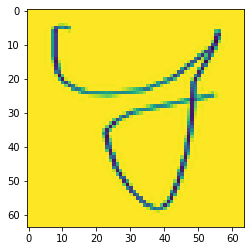

In [11]:
draw_image(x_test[0])

In [12]:
classes=np.unique(y_train)

# build dict of test images
test_images={}
for k in classes:
    test_images[k]=[]

for i,k in enumerate(y_test):
    test_images[k].append(x_test[i])

In [13]:
padding1=255*np.ones((32,32))
padding2=255*np.ones((32,64))

def get_random_image(key,images,scale=None):
    l = len(images[key])
    image = images[key][random.randint(0,l-1)]
    if scale == "Super":
        image=np.asarray(Image.fromarray(image).resize((32,32),Image.ANTIALIAS).convert('L'))
        image = np.hstack((image,padding1))
        #print (image.shape)
        #print (padding2.shape)
        image = np.vstack((image,padding2))
    elif scale == "Sub":
        image=np.asarray(Image.fromarray(image).resize((32,32),Image.ANTIALIAS).convert('L'))
        image = np.hstack((image,padding1))
        #print (image.shape)
        #print (padding2.shape)
        image = np.vstack((padding2,image))
    return image
    
get_random_image('=',test_images,"Super").shape

(64, 64)

In [14]:
def image_generate(equation,training=True):
    l=len(equation)
    images=[]
    if training:
        image_dataset = training_images
    else:
        image_dataset = test_images
    for k in equation.split(' '):
        if k[0] == '_':
            images.append(get_random_image(k[1],image_dataset,"Sub"))
        elif  k[0] == '^':
            images.append(get_random_image(k[1],image_dataset,"Super"))
        else:
            images.append(get_random_image(k,image_dataset))
    n = len(images)
    #paddings = [padding for i in range(10-n)]
    #images.extend(paddings)
    #for k in images:
    #    print (k.shape)
    return np.concatenate((images),axis=1)

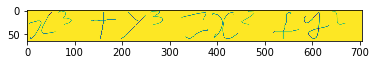

In [15]:
equation="x ^3 + y ^3 = x ^2 + y ^2"
#equation="x + y = c + d"
image = image_generate(equation,training=False)
draw_image(image)

### Prediction using Generated Images from Test Dataset

In [16]:
def predict(imgarray):
    y_prob = model.predict(imgarray.reshape(1,64,64,1))
    y_classes = y_prob.argmax(axis=-1)
    #print (y_classes)
    return classes[y_classes[0]]

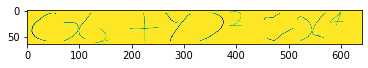

In [17]:
equation="( x _2 + y ) ^2 = x ^4"
#equation="x + y = c + d"
image = image_generate(equation,training=False)
draw_image(image)

5,59 : 1,63
62
64 64


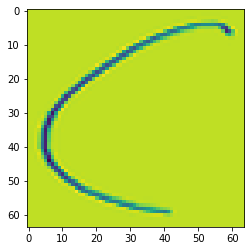

2,62 : 1,63
62
64 64


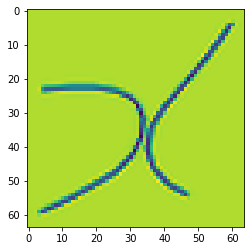

0,33 : 31,64
33
64 64


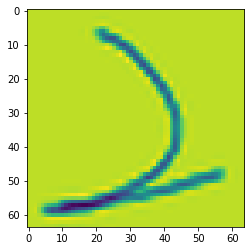

3,61 : 3,61
58
64 64


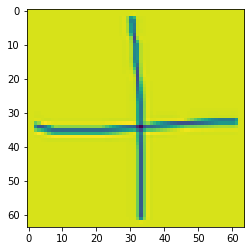

4,59 : 1,63
62
64 64


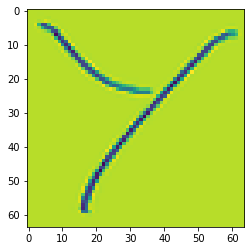

5,60 : 1,63
62
64 64


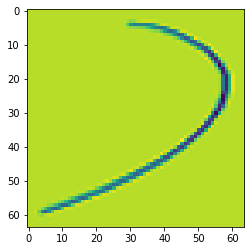

0,33 : 0,33
33
64 64


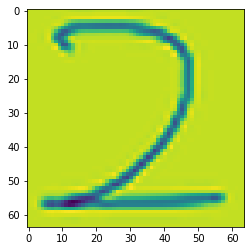

1,63 : 2,61
59
64 64


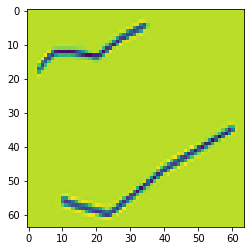

1,63 : 2,62
60
64 64


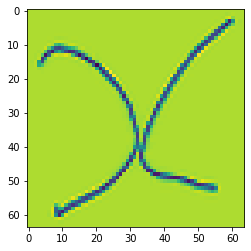

0,33 : 0,33
33
64 64


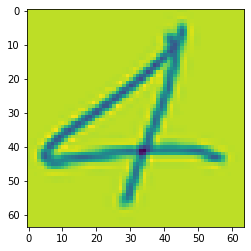

Equation is : ( x _2 + y ) ^2 = x ^4


In [18]:
equation=[]
for i in range(int(image.shape[1]/64)):
    img,script_type = crop_image(image[0:64,i*64:i*64+64])
    draw_image(img)
    prediction = predict(img)
    #print (prediction)
    if script_type != None:
        prediction=script_type+prediction
    equation.append(prediction)
print ("Equation is : %s"%(" ".join(equation)))

### Prediction on Images with custom Symbol Extraction

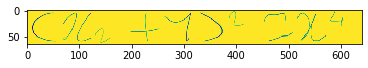

In [19]:
from PIL import Image

equation="( x _2 + y ) ^2 = x ^4"
#equation="x + y = c + d"
image = image_generate(equation,training=False)
draw_image(image)

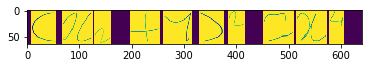

In [20]:
for i,l in enumerate(image.T):
    #print (sum(l))
    if sum(l) == 16320:
        #print (i, sum(l))
        cv2.line(image, (i, 0), (i, 64), (0,0,0))
plt.imshow(image)

In [21]:
from PIL import Image

symbols=[]
prev_sum = 0
for i,l in enumerate(image.T):
    # start of boundary
    if sum(l) != 0 and prev_sum == 0:
        #print (sum(l),prev_sum)
        boundary_start = i
    # end of boundary
    if sum(l) == 0 and prev_sum != 0:
        boundary_end=i
        #print (boundary_start , boundary_end)
        if (boundary_end - boundary_start) > 1:
            #draw_image(image[0 : 64, boundary_start : boundary_end])
            symbols.append(image[0 : 64, boundary_start : boundary_end])
    prev_sum = sum(l)

0,49 : 1,63
62
64 49


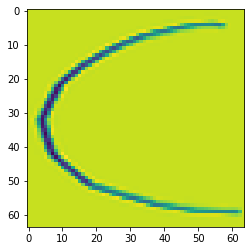

(
0,59 : 1,63
62
64 59


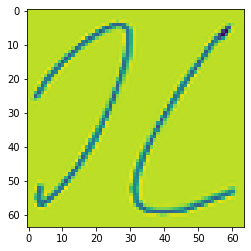

x
0,32 : 31,64
33
64 32


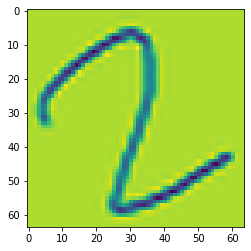

2
0,58 : 4,61
57
64 58


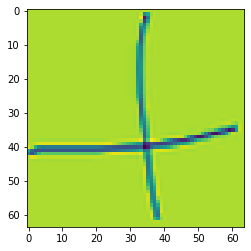

+
0,54 : 3,63
60
64 54


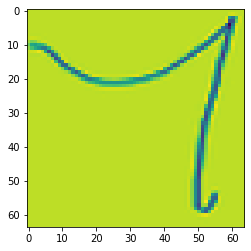

y
0,48 : 1,63
62
64 48


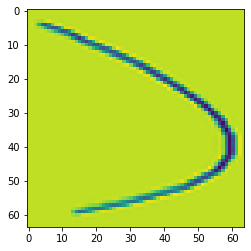

)
0,30 : 0,33
33
64 30


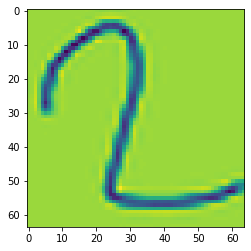

2
0,60 : 2,62
60
64 60


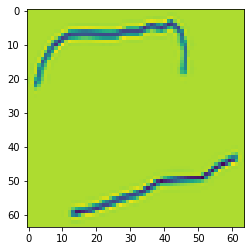

=
0,60 : 2,62
60
64 60


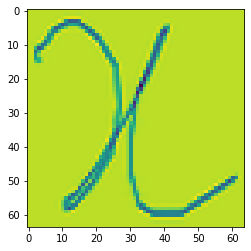

x
0,29 : 0,33
33
64 29


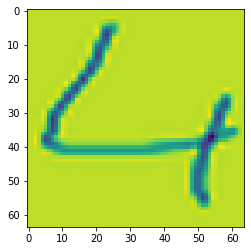

4
Equation is : ( x _2 + y ) ^2 = x ^4


In [22]:
from PIL import Image

equation=[]
## Get Prediction
for k in symbols:
    img,script_type = crop_image(k)
    draw_image(img)
    prediction = predict(img)
    print (prediction)
    if script_type != None:
        prediction=script_type+prediction
    equation.append(prediction)
print ("Equation is : %s"%(" ".join(equation)))

### Prediction on Images with Symbol Extraction using CV

In [23]:
def getSymbols(img):
    #img = cv.imread(img_location)
    #imgray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    ret, thresh = cv.threshold(img, 160, 255, cv.THRESH_BINARY_INV)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
    dilate = cv2.dilate(thresh, kernel , iterations=4)
    
    # Find contours in the image
    cnts = cv2.findContours(dilate, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    #cv2.drawContours(img, cnts[0], -1, (0,255,0), 3)
    #plt.imshow(img)
    #plt.show()
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    cnts=  sorted(cnts, key=lambda ctr: cv2.boundingRect(ctr)[0])
    contours = []
    sub_images = []
    threshold_min_area = 200
    threshold_max_area = 6000
    for c in cnts:
        x,y,w,h = cv2.boundingRect(c)
        area = cv2.contourArea(c)
        if area > threshold_min_area and area < threshold_max_area:
            contours.append(c)
            print ("Area : %f,%f "%(x,x+h))
            sub_images.append((x , x + w))
            draw_image(img[y : y + h, x : x + w])
                    #cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0),1)

    print("%d Sub images obtained successfully"%len(sub_images))
    
    boundary=0
    separated_boundaries=[]
    for i,k in enumerate(sub_images):
        if i>0 and k[0]>sub_images[i-1][1]:
            separated_boundaries.append((sub_images[i-1][0],sub_images[i-1][1]))
    separated_boundaries.append((sub_images[-1][0],sub_images[-1][1]))

    symbols=[]
    for i,k in enumerate(separated_boundaries):
        #print (k)
        #draw_image(img[0 : 64, k[0] : k[1]])
        symbols.append(img[0 : 64, k[0] : k[1]])
        prev_boundary = k
    
    return symbols

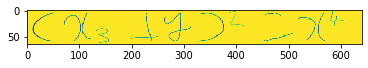

In [24]:
from PIL import Image

equation="( x _3 + y ) ^2 = x ^4"
#equation="x + y = c + d"
image = image_generate(equation,training=False)
draw_image(image)
img=Image.fromarray(image).convert("L")
img.save("simple_equation1.png", "PNG")

Area : 7.000000,69.000000 


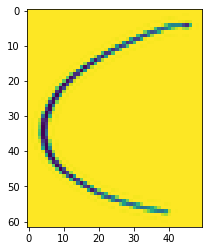

Area : 66.000000,128.000000 


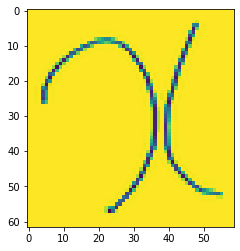

Area : 128.000000,159.000000 


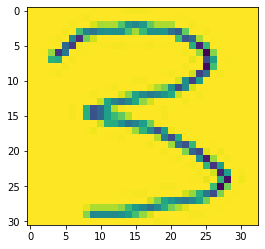

Area : 194.000000,256.000000 


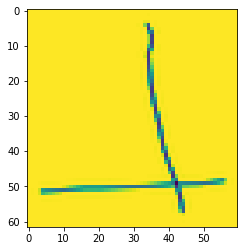

Area : 258.000000,320.000000 


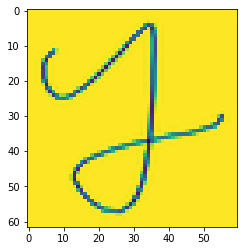

Area : 324.000000,386.000000 


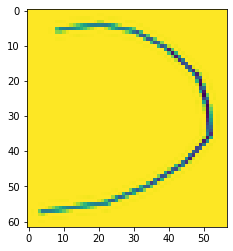

Area : 449.000000,472.000000 


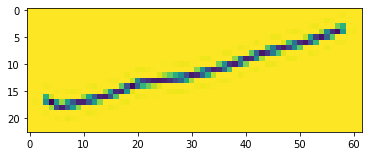

Area : 450.000000,466.000000 


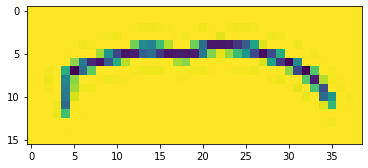

Area : 514.000000,576.000000 


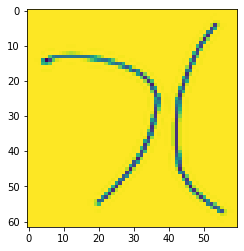

Area : 575.000000,608.000000 


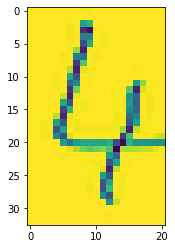

10 Sub images obtained successfully
0,50 : 1,63
62
64 50


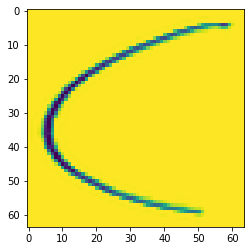

(
1,59 : 1,63
62
64 59


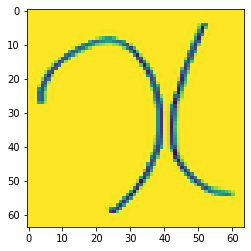

x
0,32 : 31,64
33
64 33


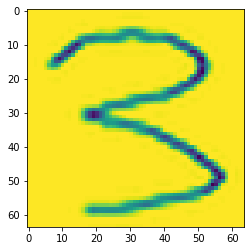

3
0,60 : 1,63
62
64 60


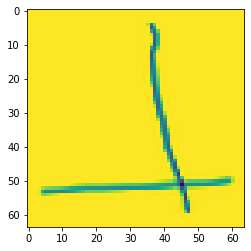

+
1,59 : 1,63
62
64 60


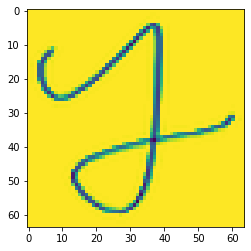

y
0,56 : 1,63
62
64 57


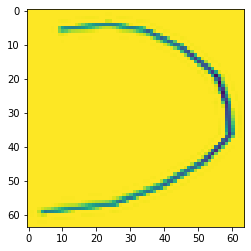

)
0,39 : 2,62
60
64 39


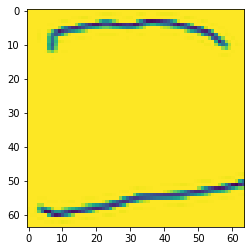

=
1,60 : 1,63
62
64 60


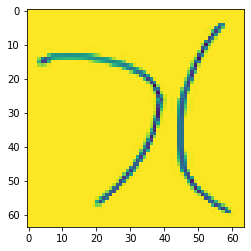

x
1,21 : 0,33
33
64 21


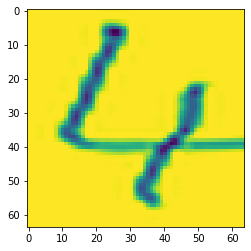

4
Equation is : ( x _3 + y ) = x ^4


In [25]:
from PIL import Image

equation=[]
symbols=getSymbols(np.array(img))
## Get Prediction
for k in symbols:
    img,script_type = crop_image(k)
    draw_image(img)
    prediction = predict(img)
    print (prediction)
    if script_type != None:
        prediction=script_type+prediction
    equation.append(prediction)
print ("Equation is : %s"%(" ".join(equation)))

### Random Data

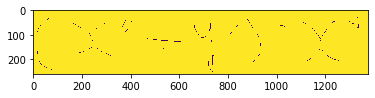

(261, 1376)

In [59]:
image=np.asarray(Image.open('random_equation.png').convert('L'))
draw_image(image)
image.shape

261 1376


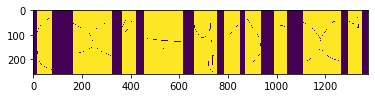

In [60]:
height, width = image.shape
print (height, width)
for i,l in enumerate(image.T):
    #print (sum(l))
    if np.average(l) == 255:
        #print (i, sum(l))
        cv2.line(image, (i, 0), (i, height), (0,0,0))
plt.imshow(image)

In [61]:
from PIL import Image

symbols=[]
prev_sum = 0
height, width = image.shape
print (height, width)
for i,l in enumerate(image.T):
    # start of boundary
    if sum(l) != 0 and prev_sum == 0:
        #print (sum(l),prev_sum)
        boundary_start = i
    # end of boundary
    if sum(l) == 0 and prev_sum != 0:
        boundary_end=i
        #print (boundary_start , boundary_end)
        if (boundary_end - boundary_start) > 1:
            #draw_image(image[0 : 64, boundary_start : boundary_end])
            symbols.append(image[0 : height, boundary_start : boundary_end])
    prev_sum = sum(l)

261 1376


0,65 : 33,244
211
261 65


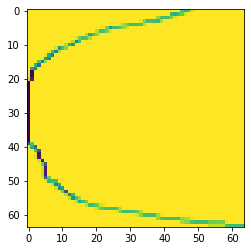

(
0,160 : 53,188
135
261 160


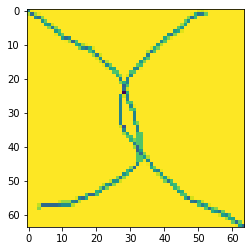

x
0,57 : 39,99
60
261 57


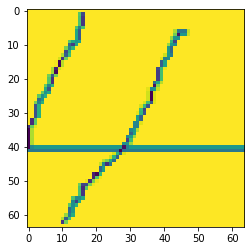

y
0,161 : 70,198
128
261 161


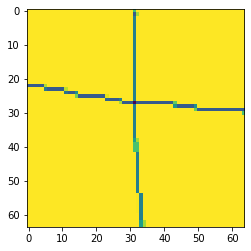

+
0,95 : 14,252
238
261 95


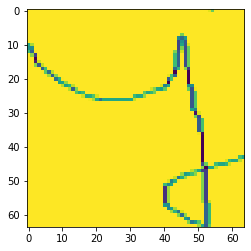

y
0,63 : 42,104
62
261 63


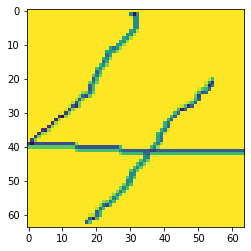

4
0,66 : 27,227
200
261 66


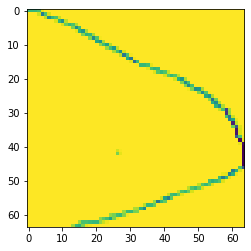

)
0,54 : 60,113
53
261 54


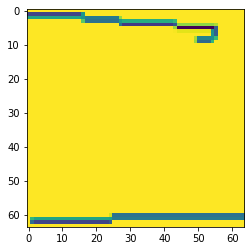

=
0,159 : 45,211
166
261 159


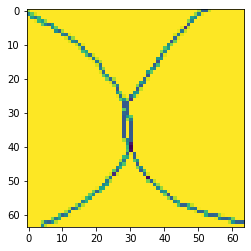

x
0,59 : 22,98
76
261 59


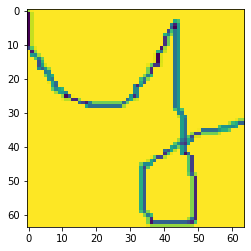

y
Equation is : ( x ^y + y ^4 ) = x ^y


In [62]:
from PIL import Image

operators=['=','-','+']
equation=[]
## Get Prediction
for k in symbols:
    img,script_type = crop_image(k)
    draw_image(img)
    prediction = predict(img)
    print (prediction)
    if script_type != None and prediction not in operators:
        prediction=script_type+prediction
    equation.append(prediction)
print ("Equation is : %s"%(" ".join(equation)))